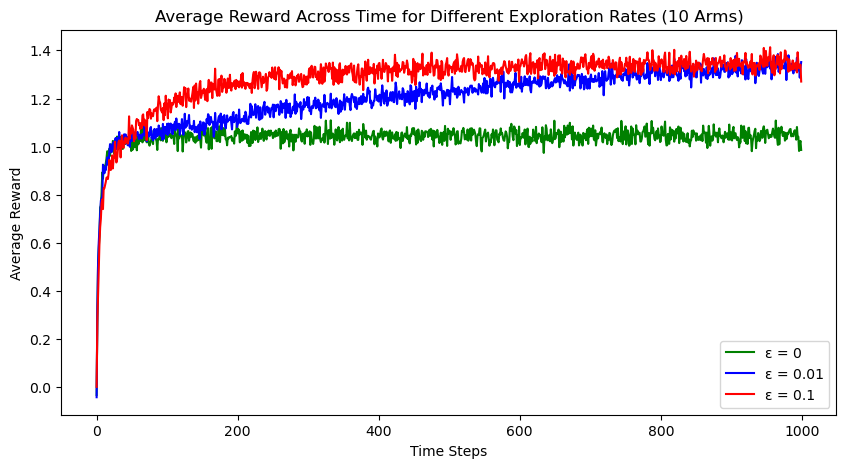

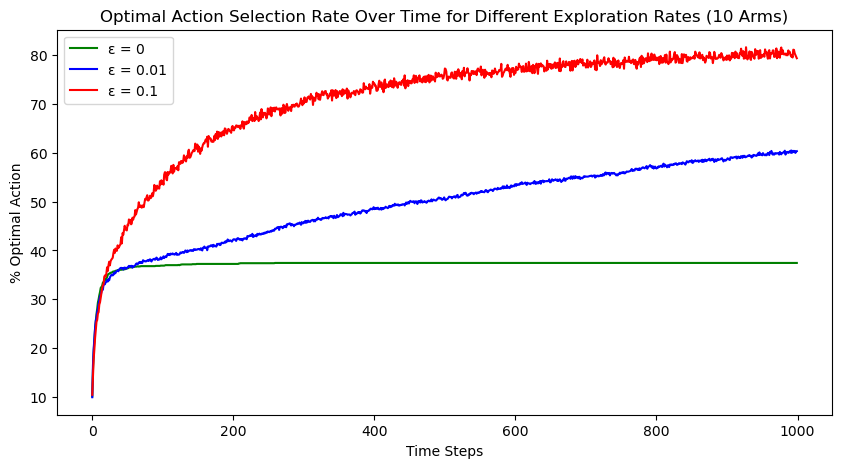

In [4]:
import numpy as np
import matplotlib.pyplot as plt

"""
This program simulates a multi-armed bandit problem using the epsilon-greedy strategy.
It evaluates three exploration rates (epsilon values) over multiple trials, plotting
the average reward and the percentage of optimal actions across time steps for a 
10-armed bandit configuration.
"""

# --- Configuration Parameters ---
num_arms = 10          # Total number of arms available in the bandit
num_steps = 1000       # Number of time steps (pulls) in each trial
epsilon_list = [0, 0.01, 0.1]  # Exploration probabilities to test
num_trials = 2000      # Number of trials to average results over

# --- Function to Execute a Single Bandit Trial ---
def simulate_bandit_run(exploration_prob, num_arms, num_steps):
    """
    Executes a single trial of the epsilon-greedy algorithm for the bandit problem.

    Args:
        exploration_prob (float): Probability of choosing a random arm
        num_arms (int): Number of bandit arms
        num_steps (int): Number of steps to simulate

    Returns:
        tuple: Arrays containing step-wise rewards and optimal action flags
    """
    # Define true reward means for each arm, drawn from a standard normal distribution
    arm_true_means = np.random.normal(0, 1, num_arms)
    # Determine the best arm based on true means
    best_arm = np.argmax(arm_true_means)
    # Initialize estimated values for each arm to zero
    arm_value_estimates = np.zeros(num_arms)
    # Track how many times each arm is selected
    arm_selection_counts = np.zeros(num_arms)
    # Store rewards and optimal action indicators for each step
    step_rewards = np.zeros(num_steps)
    optimal_action_flags = np.zeros(num_steps)

    # Simulate the bandit process over all steps
    for step in range(num_steps):
        # Decide between exploration and exploitation
        if np.random.rand() < exploration_prob:
            # Exploration: Pick a random arm
            chosen_arm = np.random.randint(num_arms)
        else:
            # Exploitation: Pick the arm with the highest estimated value
            chosen_arm = np.argmax(arm_value_estimates)

        # Obtain a reward from the chosen arm’s normal distribution
        reward = np.random.normal(arm_true_means[chosen_arm], 1)
        # Update the selection count for the chosen arm
        arm_selection_counts[chosen_arm] += 1
        # Update the estimated value incrementally
        arm_value_estimates[chosen_arm] += (reward - arm_value_estimates[chosen_arm]) / arm_selection_counts[chosen_arm]
        # Record the reward and optimal action status
        step_rewards[step] = reward
        optimal_action_flags[step] = 1 if chosen_arm == best_arm else 0

    return step_rewards, optimal_action_flags

# --- Simulate Trials and Aggregate Results ---
reward_records = {}
optimal_action_rates = {}
for exploration_prob in epsilon_list:
    # Arrays to hold results across all trials
    trial_rewards = np.zeros((num_trials, num_steps))
    trial_optimal_actions = np.zeros((num_trials, num_steps))
    # Run the specified number of trials
    for trial in range(num_trials):
        rewards, optimal_flags = simulate_bandit_run(exploration_prob, num_arms, num_steps)
        trial_rewards[trial] = rewards
        trial_optimal_actions[trial] = optimal_flags

    # Compute averages across trials
    avg_reward_per_step = np.mean(trial_rewards, axis=0)
    avg_optimal_action_rate = np.mean(trial_optimal_actions, axis=0) * 100  # Convert to percentage
    reward_records[exploration_prob] = avg_reward_per_step
    optimal_action_rates[exploration_prob] = avg_optimal_action_rate

# --- Plot Average Reward Graph ---
plt.figure(figsize=(10, 5))
color_map = {0: 'green', 0.01: 'blue', 0.1: 'red'}
for exploration_prob, avg_rewards in reward_records.items():
    plt.plot(avg_rewards, label=f"ε = {exploration_prob}", color=color_map[exploration_prob])
plt.xlabel("Time Steps")
plt.ylabel("Average Reward")
plt.title("Average Reward Across Time for Different Exploration Rates (10 Arms)")
plt.legend()
plt.show()

# --- Plot Optimal Action Percentage Graph ---
plt.figure(figsize=(10, 5))
for exploration_prob, avg_optimal_rate in optimal_action_rates.items():
    plt.plot(avg_optimal_rate, label=f"ε = {exploration_prob}", color=color_map[exploration_prob])
plt.xlabel("Time Steps")
plt.ylabel("% Optimal Action")
plt.title("Optimal Action Selection Rate Over Time for Different Exploration Rates (10 Arms)")
plt.legend()
plt.show()